In [9]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import datetime
import os

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

plt.rcParams['figure.figsize'] = (10, 4)

In [10]:
data_dir = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC'

In [11]:
titulo_short = 'GO'
titulo =  ''

In [12]:
FileIn =  './data/sstLD_anom_'+titulo_short+'.nc'
FileOut = './images/map_sstd_anom_'+titulo_short+'.png'
Title  = 'Anomalia de temperatura superficial en el '+ titulo

In [13]:
data = xr.open_dataset(FileIn)
sst = data.sst

In [14]:
sst

<xarray.DataArray 'sst' (lat: 640, lon: 1440)>
[921600 values with dtype=float32]
Coordinates:
    time       datetime64[ns] ...
  * lat        (lat) float32 -79.88 -79.62 -79.38 -79.12 ... 79.38 79.62 79.88
  * lon        (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
    dayofyear  int64 ...

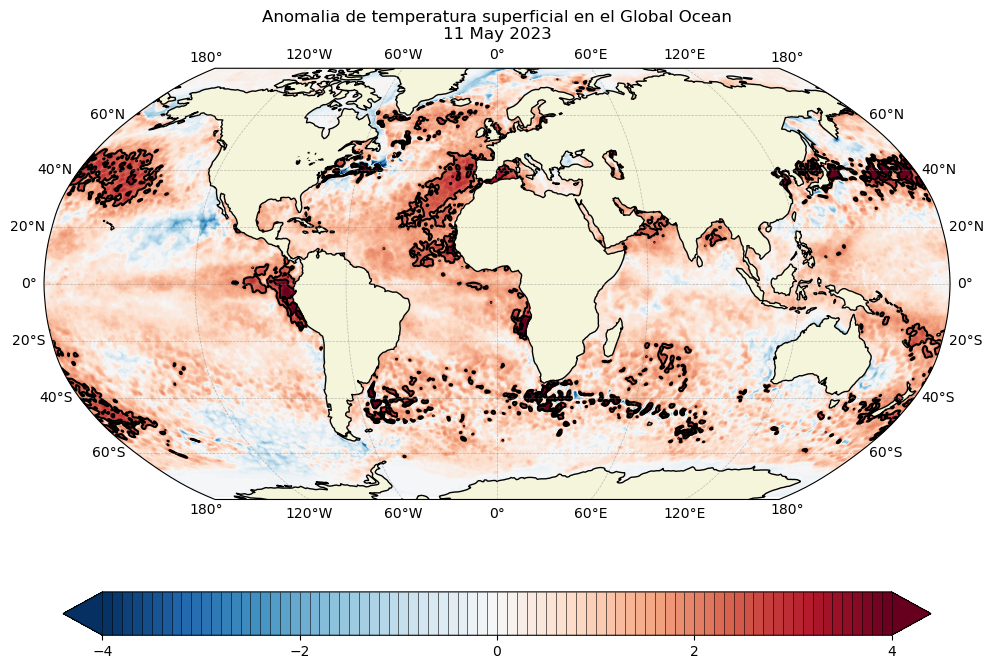

In [23]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = '110m' ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
ax.add_feature(cfeature.LAND)
    
#ax.set_extent([-180 , 180, -85,85], crs=ccrs.PlateCarree())


cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-4,4.1,0.1), 
               transform=ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -4,vmax = 4,extend='both')

ax.contour(sst.lon,sst.lat,sst, levels=[2,3], colors='k',
               transform=ccrs.PlateCarree())

cbar=fig.colorbar(cm,ax=ax, location='bottom',
                  shrink=.8, ticks=[-4,-2,0,2,4], drawedges=True)
ax.gridlines(draw_labels=True, linewidth=.5, color='gray', alpha=0.5, linestyle='--')

ax.set_title(Title + '\n' +
             sst.time.dt.strftime("%d %B %Y").values);

plt.savefig(FileOut)